# Part 2 : Exploratory Data Analysis

Welcome to the second stage, in this section we will use the cleaned scrape dataset to explore and understand the data, and then draw some insights. 

## Importing Library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from scipy import stats

## Importing Dataset

In [2]:
df = pd.read_csv("house_clean.csv")
df

,url,address,building_area,surface_area,bedroom,bathroom,parking_area,tenure,price
0,https://www.rumah123.com/properti/cimahi/hos62...,"Cimahi Utara, Cimahi",170.0,205.0,2,1,0,SHM - Sertifikat Hak Milik,2.500000e+09
1,https://www.rumah123.com/properti/bandung/hos9...,"Lembang, Bandung Barat",50.0,85.0,3,2,1,SHM - Sertifikat Hak Milik,9.980000e+08
2,https://www.rumah123.com/properti/cimahi/hos91...,"Cimahi Utara, Cimahi",65.0,120.0,3,2,2,SHM - Sertifikat Hak Milik,1.040000e+09
3,https://www.rumah123.com/properti/cimahi/hos86...,"Cimahi Utara, Cimahi",200.0,150.0,4,3,1,SHM - Sertifikat Hak Milik,1.650000e+09
4,https://www.rumah123.com/properti/cimahi/hos87...,"Cimahi Utara, Cimahi",120.0,386.0,4,3,2,SHM - Sertifikat Hak Milik,2.500000e+09
...,...,...,...,...,...,...,...,...,...
896,https://www.rumah123.com/properti/cimahi/hos29...,"Cimahi Selatan, Cimahi",90.0,104.0,2,2,0,SHM - Sertifikat Hak Milik,1.200000e+09
897,https://www.rumah123.com/properti/bandung/hos8...,"Lembang, Bandung Barat",590.0,756.0,11,6,0,SHM - Sertifikat Hak Milik,5.500000e+09
898,https://www.rumah123.com/properti/cimahi/hos91...,"Cimahi Utara, Cimahi",55.0,80.0,2,2,1,SHM - Sertifikat Hak Milik,7.000000e+08
899,https://www.rumah123.com/properti/bandung/hos8...,"Cihanjuang, Bandung Barat",60.0,90.0,3,1,1,SHM - Sertifikat Hak Milik,7.500000e+08


## Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            901 non-null    object 
 1   address        901 non-null    object 
 2   building_area  901 non-null    float64
 3   surface_area   901 non-null    float64
 4   bedroom        901 non-null    int64  
 5   bathroom       901 non-null    int64  
 6   parking_area   901 non-null    int64  
 7   tenure         901 non-null    object 
 8   price          901 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 63.5+ KB


In [4]:
df.shape

(901, 9)

We have 901 rows and 9 columns. The columns represent various characteristics of each unit, and is described as follows.
<br>

|__No.__|__Features__|__Description__|
| - | - | - |
|1| url | Url link of each house unit page on the rumah123.com website |
|2| Address | District name or area of the house is located |
|3| Building Area | Total Building Area in meters squared (m²)|
|4| Surface Area | Total Surface Area in meters squared (m²) |
|5| Bedroom | Number of Bedroom |
|6| Bathroom | Number of Bathroom |
|7| Parking Area | Number of Parking Area in Vehicle (Car) Unit |
|8| Tenure | Ownership Status or Type of Ownership License |
|9| Price | Total Selling Price in Rupiah (IDR)|


In [5]:
df.describe()

,building_area,surface_area,bedroom,bathroom,parking_area,price
count,901.000000,901.000000,901.000000,901.000000,901.000000,9.010000e+02
mean,139.641509,226.735849,3.243063,2.221976,0.803552,1.710226e+09
std,149.122288,776.352159,2.375750,1.888446,1.742995,2.665649e+09
min,30.000000,25.000000,0.000000,0.000000,0.000000,6.670000e+06
25%,55.000000,80.000000,2.000000,1.000000,0.000000,6.500000e+08
50%,90.000000,114.000000,3.000000,2.000000,1.000000,1.000000e+09
75%,168.000000,171.000000,4.000000,3.000000,1.000000,1.700000e+09
max,2000.000000,20000.000000,34.000000,25.000000,25.000000,4.200000e+10


In [6]:
# Unique value per columns
for item in df.columns:
    print(item + '=',(df[item].unique()))

url= ['https://www.rumah123.com/properti/cimahi/hos6216128/'
 'https://www.rumah123.com/properti/bandung/hos9080715/'
 'https://www.rumah123.com/properti/cimahi/hos9131775/'
 'https://www.rumah123.com/properti/cimahi/hos8606127/'
 'https://www.rumah123.com/properti/cimahi/hos8765184/'
 'https://www.rumah123.com/properti/cimahi/hos8556426/'
 'https://www.rumah123.com/properti/bandung/hos9047315/'
 'https://www.rumah123.com/properti/cimahi/hos9135610/'
 'https://www.rumah123.com/properti/cimahi/hos9014407/'
 'https://www.rumah123.com/properti/bandung-barat/hos8506801/'
 'https://www.rumah123.com/properti/bandung/hos9135602/'
 'https://www.rumah123.com/properti/cimahi/hos9125008/'
 'https://www.rumah123.com/properti/cimahi/hos8919076/'
 'https://www.rumah123.com/properti/bandung/hos7726218/'
 'https://www.rumah123.com/properti/cimahi/hos8933114/'
 'https://www.rumah123.com/properti/bandung/hos9134465/'
 'https://www.rumah123.com/properti/cimahi/hos8735349/'
 'https://www.rumah123.com/prop

In [7]:
# Detecting Null Values
df.isnull().sum()

url              0
address          0
building_area    0
surface_area     0
bedroom          0
bathroom         0
parking_area     0
tenure           0
price            0
dtype: int64

In [8]:
# Detecting Unidentified Null Values 
for item in df :
     print (item + '=', (df[item][df[item] == '-']).count())

url= 0
address= 0
building_area= 0
surface_area= 0
bedroom= 0
bathroom= 0
parking_area= 0
tenure= 0
price= 0


In [9]:
# Detecting Duplicate Values
for item in df :
    print (item + '=', (df.duplicated().sum()))

url= 0
address= 0
building_area= 0
surface_area= 0
bedroom= 0
bathroom= 0
parking_area= 0
tenure= 0
price= 0


## EDA

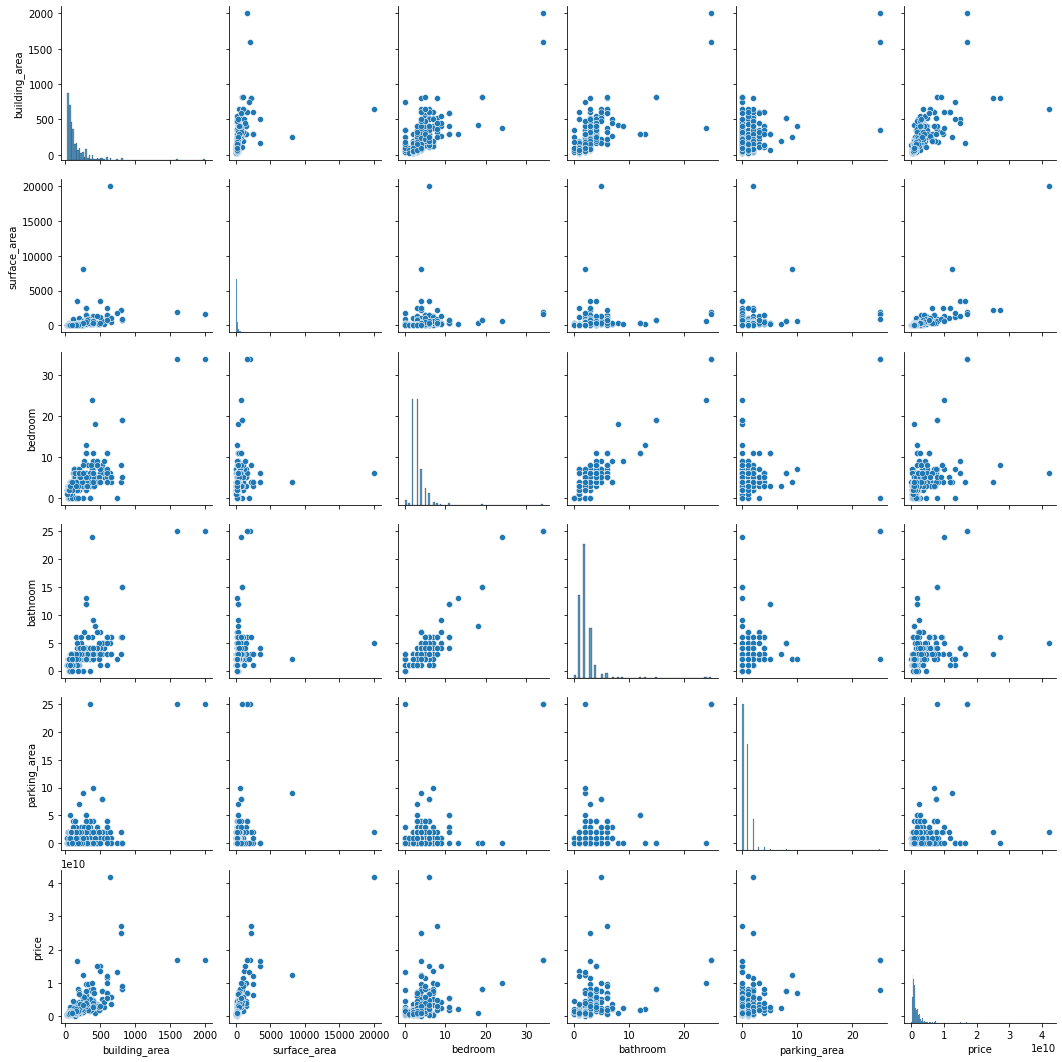

In [10]:
sns.pairplot(df)

### Number of Bedroom

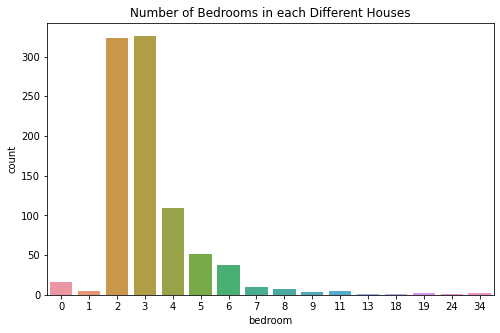

In [11]:
plt.figure(figsize=(8,5))
plot = sns.countplot(data = df, x = 'bedroom').set_title('Number of Bedrooms in each Different Houses')
plt.show()

In [12]:
df['bedroom'].value_counts().sort_index()

0      16
1       5
2     324
3     326
4     109
5      51
6      37
7      10
8       7
9       4
11      5
13      1
18      1
19      2
24      1
34      2
Name: bedroom, dtype: int64

The houses in this dataset have 0 till 24 number of bedroom. As we can see, almost every house has 2 and 3 bedrooms. Before we get assume, the question is why most houses only have 2 and 3 bedrooms?

In [13]:
df['building_area'].value_counts().head()

50.0     50
45.0     50
38.0     37
100.0    37
80.0     34
Name: building_area, dtype: int64

In [14]:
df['surface_area'].value_counts().head()

120.0    82
72.0     56
60.0     42
105.0    31
90.0     30
Name: surface_area, dtype: int64

In [15]:
df.corr()['bedroom'].sort_values(ascending= False)

bedroom          1.000000
bathroom         0.892160
building_area    0.752648
price            0.475993
parking_area     0.469842
surface_area     0.203632
Name: bedroom, dtype: float64

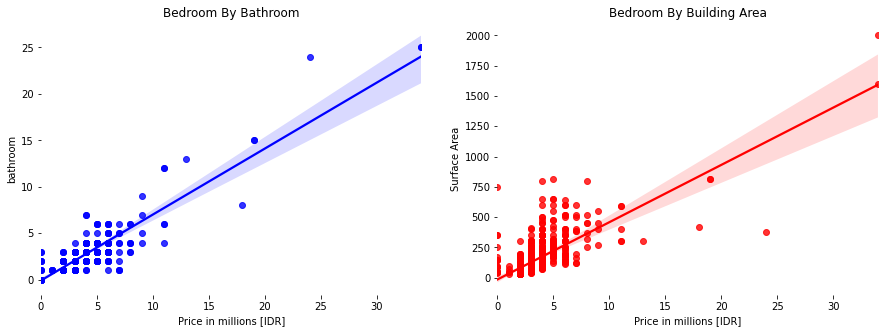

In [16]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.regplot(x='bedroom',y='bathroom', data=df, color='b',ax=axes[0])
sns.regplot(x='bedroom',y='building_area', data=df, color='r', ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price in millions [IDR]', title='Bedroom By Bathroom')
axes[1].set(xlabel='Price in millions [IDR]', ylabel='Surface Area', title='Bedroom By Building Area')
axes[1].yaxis.set_label_position("left")
plt.show()

First of all, I look the land area, because we need a land to build a building. The fact is, mostly the land or surface area in this dataset are small enough, generally measuring is only 120 meters squared, that's why most of the building area are small too.  
<br>
After that, I tried to look at the correlation matrix. From above, we can assume that the number of bedrooms is adjusted by "building area". The larger "building area", the more "bedroom" too. And, it's turns up "bathroom" and "building area" have a strong correlation with "bedroom", perhaps it's mean that having many bathrooms are indicated the house has many occupants, so they need a lot of bedrooms. So we can get some conclusion, the number of bedroom affected by total building area, and number of occupants.
<br>

The next question is, what does 0 number of bedroom means?

In [17]:
pd.set_option('display.max_colwidth', None)
df[df['bedroom'] == 0].url

93      https://www.rumah123.com/properti/cimahi/hos8975780/
329     https://www.rumah123.com/properti/cimahi/hos7184596/
336     https://www.rumah123.com/properti/cimahi/hos3296459/
388    https://www.rumah123.com/properti/bandung/hos8969898/
389     https://www.rumah123.com/properti/cimahi/hos8701256/
477     https://www.rumah123.com/properti/cimahi/hos7988342/
479    https://www.rumah123.com/properti/bandung/hos9077785/
505     https://www.rumah123.com/properti/cimahi/hos8668217/
519     https://www.rumah123.com/properti/cimahi/hos8581079/
528    https://www.rumah123.com/properti/bandung/hos8089857/
632    https://www.rumah123.com/properti/bandung/hos7110541/
649     https://www.rumah123.com/properti/cimahi/hos8801434/
692    https://www.rumah123.com/properti/bandung/hos7794223/
697     https://www.rumah123.com/properti/cimahi/hos3296443/
725     https://www.rumah123.com/properti/cimahi/hos7184595/
819     https://www.rumah123.com/properti/cimahi/hos8474299/
Name: url, dtype: object

After I access for detail by link on each row, mostly that houses in the past functioned as places of business, so generally they don't have or need any bedrooms.

    bedroom         price
0         0  1.275000e+09
1         1  4.500000e+08
2         2  6.052500e+08
3         3  1.100000e+09
4         4  1.800000e+09
5         5  2.500000e+09
6         6  3.000000e+09
7         7  5.994000e+09
8         8  2.900000e+09
9         9  3.425000e+09
10       11  2.800000e+09
11       13  1.950000e+09
12       18  8.000000e+08
13       19  8.000000e+09
14       24  1.000000e+10
15       34  1.700000e+10


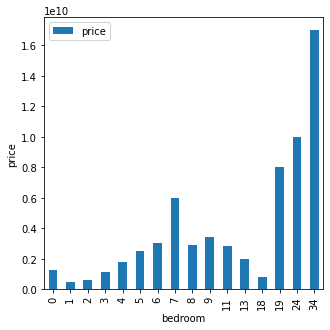

In [18]:
price_per_bedroom = df.groupby('bedroom')['price'].median().reset_index()
print(price_per_bedroom)

price_per_bedroom.plot(x = 'bedroom', y = 'price', kind = 'bar', figsize = [5,5])
plt.xlabel('bedroom')
plt.ylabel('price')
plt.show()

We got a surprise here. Why is the average price of houses with 0 bedrooms are more expensive than 13 and 18 bedrooms? I think this is the benefit of data exploration manually. This data doesn't match our common sense, so we need to investigate it. We start by checking for outliers.

In [19]:
df[df['bedroom'] == 0].sort_values(by=['price'], ascending=False).head(5)

,url,address,building_area,surface_area,bedroom,bathroom,parking_area,tenure,price
692,https://www.rumah123.com/properti/bandung/hos7794223/,"Cimahi Selatan, Cimahi",745.0,1827.0,0,2,0,Tidak Ada Penjelasan,1.327500e+10
477,https://www.rumah123.com/properti/cimahi/hos7988342/,"Cimahi Tengah, Cimahi",350.0,900.0,0,2,25,Tidak Ada Penjelasan,7.750000e+09
528,https://www.rumah123.com/properti/bandung/hos8089857/,"Cimahi Tengah, Cimahi",250.0,189.0,0,0,0,SHM - Sertifikat Hak Milik,4.600000e+09
93,https://www.rumah123.com/properti/cimahi/hos8975780/,"Cimahi Tengah, Cimahi",150.0,210.0,0,2,3,SHM - Sertifikat Hak Milik,2.800000e+09
388,https://www.rumah123.com/properti/bandung/hos8969898/,"Cimahi Utara, Cimahi",350.0,350.0,0,0,0,SHM - Sertifikat Hak Milik,2.200000e+09


First, we filter 'price' by 'bedroom'.  After that, we can draw the boxplot using seaborn and we see there are two outliers. Let's check it out.

<AxesSubplot:xlabel='price'>

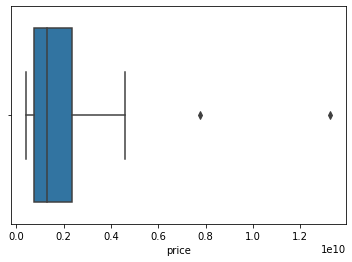

In [20]:
house_check = df['bedroom'] == 0
sns.boxplot(x = df[house_check].price)

In [21]:
pd.set_option('display.max_colwidth', None)
df[house_check].sort_values(by=['price'], ascending=False).head(2).url

692    https://www.rumah123.com/properti/bandung/hos7794223/
477     https://www.rumah123.com/properti/cimahi/hos7988342/
Name: url, dtype: object

After i checked based on the link, it turns out that the problem is in the building type is wrong. These outliers should belong to the warehouse type, not in the house type, also because the outliers are located far from other data points, so we should delete them. I'll check on other categories too.

In [22]:
i = ['https://www.rumah123.com/properti/bandung/hos7794223/','https://www.rumah123.com/properti/cimahi/hos7988342/']

for item in i :
    df.drop(df[df['url'] == item].index, inplace = True)

In [23]:
pd.set_option('display.max_colwidth', None)
df[df['bedroom'] == 11].sort_values(by=['price'], ascending=False)

,url,address,building_area,surface_area,bedroom,bathroom,parking_area,tenure,price
886,https://www.rumah123.com/properti/bandung-barat/hos8900184/,"Parongpong, Bandung Barat",590.0,756.0,11,6,3,SHM - Sertifikat Hak Milik,5.500000e+09
897,https://www.rumah123.com/properti/bandung/hos8869698/,"Lembang, Bandung Barat",590.0,756.0,11,6,0,SHM - Sertifikat Hak Milik,5.500000e+09
892,https://www.rumah123.com/properti/cimahi/hos7373652/,"Cimahi Utara, Cimahi",400.0,407.0,11,4,2,SHM - Sertifikat Hak Milik,2.800000e+09
226,https://www.rumah123.com/properti/bandung/hos9133302/,"Cihanjuang, Bandung Barat",300.0,318.0,11,12,5,SHM - Sertifikat Hak Milik,1.700000e+09
605,https://www.rumah123.com/properti/bandung/hos9132228/,"Cihanjuang, Bandung Barat",300.0,318.0,11,12,5,SHM - Sertifikat Hak Milik,1.700000e+09


In [24]:
pd.set_option('display.max_colwidth', None)
df[df['bedroom'] == 18].sort_values(by=['price'], ascending=False)

,url,address,building_area,surface_area,bedroom,bathroom,parking_area,tenure,price
17,https://www.rumah123.com/properti/cimahi/hos8949137/,"Cimahi Selatan, Cimahi",420.0,329.0,18,8,0,SHM - Sertifikat Hak Milik,800000000.0


Mostly, the houses with more than 10 bedrooms are boarding houses, so the size of the land isn't large but the size of the building is large because it's multistory. 
<br>

We can assume that in Cimahi generally they prioritize land area, so that the land area is the most determines features of selling price of the house, not the facilities.

### Number of Bathrooms

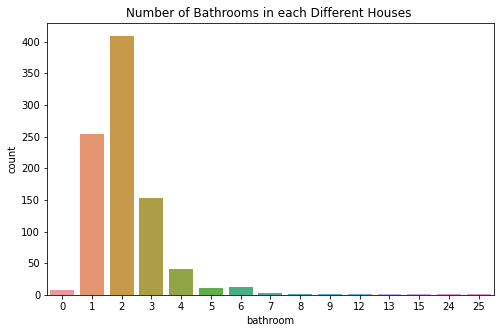

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(data = df, x = 'bathroom').set_title('Number of Bathrooms in each Different Houses ')
plt.show()

In [26]:
df['bathroom'].value_counts()

2     409
1     254
3     153
4      40
6      13
5      10
0       7
7       3
12      2
15      2
25      2
8       1
9       1
13      1
24      1
Name: bathroom, dtype: int64

As seen,  the houses in this dataset have 0 till 24 number of bathroom. Almost every house has 1 and 2 bedrooms. Like before, maybe because it's adjusted by the number of occupants need's which can be seen from the number of rooms, which mostly there are have 1 till 3 rooms too in this dataset.


### Number of Parking Area

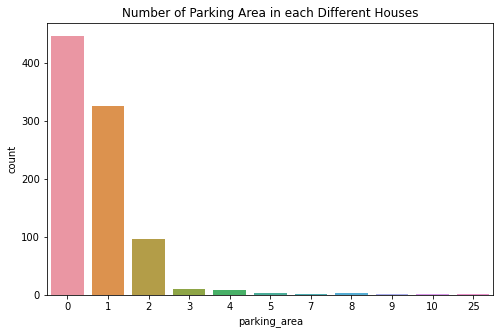

In [27]:
plt.figure(figsize=(8,5))
sns.countplot(data = df, x = 'parking_area').set_title('Number of Parking Area in each Different Houses')
plt.show()

In [28]:
df['parking_area'].value_counts()

0     447
1     326
2      96
3      10
4       9
5       3
8       3
25      2
7       1
9       1
10      1
Name: parking_area, dtype: int64

As we can see, the houses in this dataset have 0 till 25 number of  parking areas. Most of the houses have 0 parking areas, what does that mean?


In [29]:
df[df['parking_area'] ==  0].url

0             https://www.rumah123.com/properti/cimahi/hos6216128/
6            https://www.rumah123.com/properti/bandung/hos9047315/
9      https://www.rumah123.com/properti/bandung-barat/hos8506801/
14            https://www.rumah123.com/properti/cimahi/hos8933114/
16            https://www.rumah123.com/properti/cimahi/hos8735349/
                                  ...                             
887          https://www.rumah123.com/properti/bandung/hos8556188/
891           https://www.rumah123.com/properti/cimahi/hos7925294/
896           https://www.rumah123.com/properti/cimahi/hos2978756/
897          https://www.rumah123.com/properti/bandung/hos8869698/
900           https://www.rumah123.com/properti/cimahi/hos8294272/
Name: url, Length: 447, dtype: object

As before, most of the houses in this dataset are small. So after I checked manually via the link above, the houses that have 0 parking areas  ​​are small houses that don't have enough space to build a garage or parking area for even just one car. This makes sense, because generally we park the car on the side of the road, not in the garage.

## Land Features

In [30]:
df.groupby('address').median()[['building_area','surface_area']]

,building_area,surface_area
address,,
"Andir, Bandung",250.0,655.0
"Batujajar, Bandung Barat",67.5,81.0
"Cibeureum, Bandung",110.0,81.0
"Cihanjuang, Bandung Barat",80.0,81.0
"Cijerah, Bandung",70.0,150.0
"Cimahi Selatan, Cimahi",114.0,129.0
"Cimahi Tengah, Cimahi",143.0,121.5
"Cimahi Utara, Cimahi",90.0,120.0
"Cimindi, Bandung",190.0,165.5


In [31]:
df['address'].value_counts()

Cimahi Utara, Cimahi                    393
Cimahi Tengah, Cimahi                   120
Cihanjuang, Bandung Barat                71
Cimahi Selatan, Cimahi                   59
Ngamprah, Bandung Barat                  44
Parongpong, Bandung Barat                42
Sariwangi, Bandung Barat                 30
Padalarang, Bandung Barat                26
Lembang, Bandung Barat                   24
Cisarua, Bandung Barat                   23
Pasteur, Bandung                         13
Gegerkalong, Bandung                      8
Gunung Batu, Bandung                      7
Setiabudi, Bandung                        6
Setra Duta, Bandung                       6
Cijerah, Bandung                          5
Cibeureum, Bandung                        5
Batujajar, Bandung Barat                  4
Sukajadi, Bandung                         4
Sarijadi, Bandung                         3
Kota Baru Parahyangan, Bandung Barat      2
Cimindi, Bandung                          2
Sudirman, Bandung               

In this dataset, we can be seen that the area which has the largest surface and building area is __Andir__ area, but i after looking at `.value_counts` , it turns out that Andir cannot represent a majority, because we just have only one data. So in this visualization, i will drop region which has a few data because it cannot represent the whole.

In [32]:
df2 = df.copy()
land_feat = ('Sariwangi, Bandung Barat', 'Padalarang, Bandung Barat',
       'Lembang, Bandung Barat', 'Cisarua, Bandung Barat', 'Pasteur, Bandung',
       'Gegerkalong, Bandung', 'Gunung Batu, Bandung', 'Setra Duta, Bandung',
       'Setiabudi, Bandung', 'Cibeureum, Bandung', 'Cijerah, Bandung',
       'Batujajar, Bandung Barat', 'Sukajadi, Bandung', 'Sarijadi, Bandung',
       'Cimindi, Bandung', 'Kota Baru Parahyangan, Bandung Barat',
       'Andir, Bandung', 'Sudirman, Bandung')

for item in land_feat:
    df2.drop(df2[df2['address'] == item].index, inplace = True)

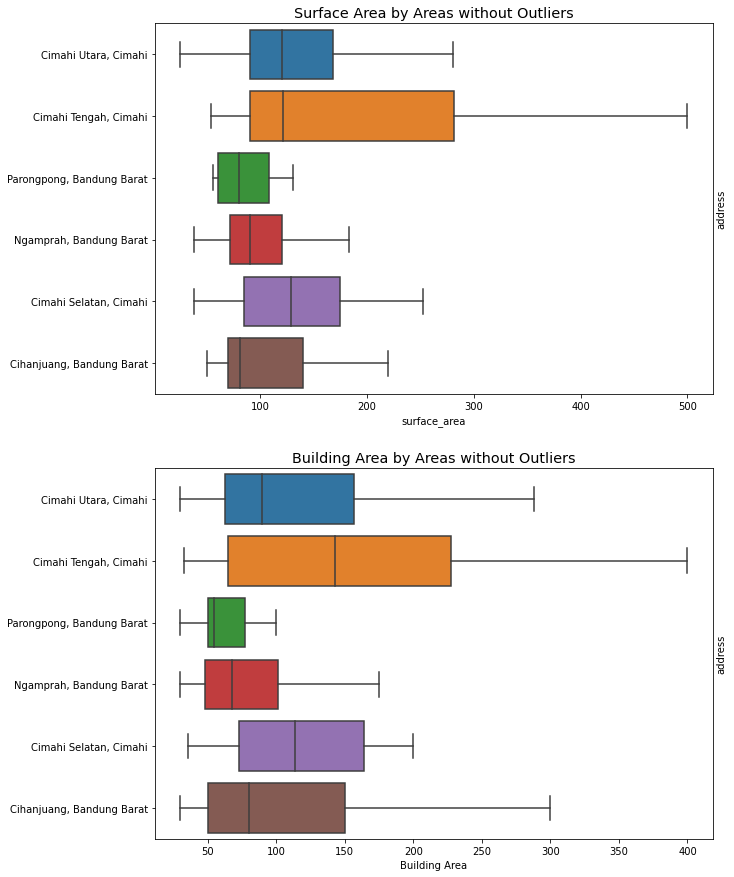

In [33]:
f, axes = plt.subplots(2, 1,figsize=(10,15))

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large'}
pylab.rcParams.update(params)

sns.boxplot(x='surface_area', y='address', data= df2, showfliers=False, ax=axes[0])
sns.boxplot(x='building_area', y='address', data= df2, showfliers=False, ax=axes[1])

axes[0].set(title='Surface Area by Areas without Outliers')
axes[1].set(title='Building Area by Areas without Outliers')
axes[0].yaxis.set_label_position("right")
axes[1].yaxis.set_label_position("right")

plt.xlabel("Building Area")
plt.show()

We can see, based on the boxplot above, the area that has houses with the largest surface and building area are generally located in __Cimahi Tengah__, and that area have more data than 'Cimahi Selatan', so it can increase the level of validation. This makes sense because in 'Cimahi Tengah', there are so many big housing estates.
<br>

Next, i want to know price per meter in every area that has enough data because that  has a fairly strong validation.

In [34]:
land_per_meter = df2.groupby('address').median()[['price','surface_area']]
land_per_meter['land_per_meters'] = (750000000 / 81, 995000000 / 129, 1350000000 / 121, 1096000000 / 120, 642500000 / 90, 740500000 / 80) 
land_per_meter = land_per_meter.astype(int)

land_per_meter.sort_values(by= 'land_per_meters',ascending= False)

,price,surface_area,land_per_meters
address,,,
"Cimahi Tengah, Cimahi",1350000000,121,11157024
"Cihanjuang, Bandung Barat",750000000,81,9259259
"Parongpong, Bandung Barat",740500000,80,9256250
"Cimahi Utara, Cimahi",1096000000,120,9133333
"Cimahi Selatan, Cimahi",995000000,129,7713178
"Ngamprah, Bandung Barat",642500000,90,7138888


As we can see, based on that table, the area that has a high house price value in this dataset is __Cimahi Tengah__, Which has reached 11 million rupiah per meter. I get that number from dividing average house price by total surface area. I think that nominal is large enough for a house measuring 121 square meters. 
<br>

So from the table above, I think that if I buy a house, 'Cimahi Selatan' and 'Cimahi Utara' areas are quite promising areas, remember that they have larger surface area and cheaper price per meter compared to other areas in this dataset.

## Tenure

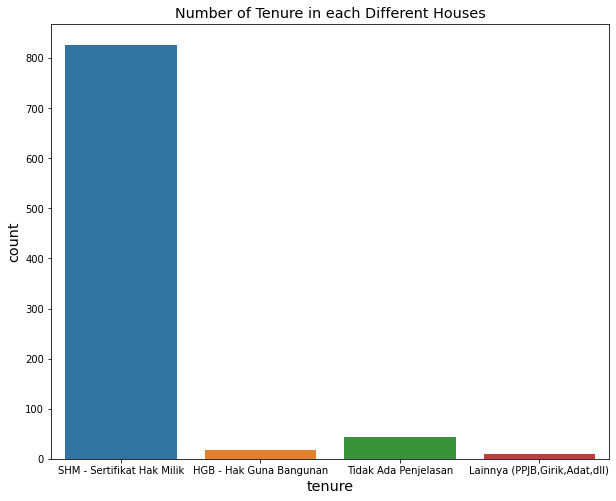

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x = 'tenure').set_title('Number of Tenure in each Different Houses')
plt.show()

In [36]:
df['tenure'].value_counts()

SHM - Sertifikat Hak Milik       827
Tidak Ada Penjelasan              44
HGB - Hak Guna Bangunan           18
Lainnya (PPJB,Girik,Adat,dll)     10
Name: tenure, dtype: int64

Mostly, the tenure statuses in this dataset is type __SHM - Sertifikat hak milik__, which means that the building and land are belong to house occupants. Different from 'HGB - Hak Guna Bangunan' type, that type are indicates that the building belongs to occupants, while the land belongs to a third party or other party. Generally, the houses with that status are located in a housing complex. 'Lainnya' tenure statuses type are types beyond two types above, it's like 'PPJB','Tanah Adat', etc. And, as previously explained at data cleaning stage, 'Tidak Ada Penjelasan' type is an assumption that are the website users are don't want to tell their tenure statuses, so we identify as 'Tidak Ada Penjelasan'.

## Feature Target

In [4]:
df.corr()['price'].sort_values(ascending= False)

price            1.000000
surface_area     0.761347
building_area    0.710950
bedroom          0.475993
bathroom         0.471330
parking_area     0.337756
Name: price, dtype: float64

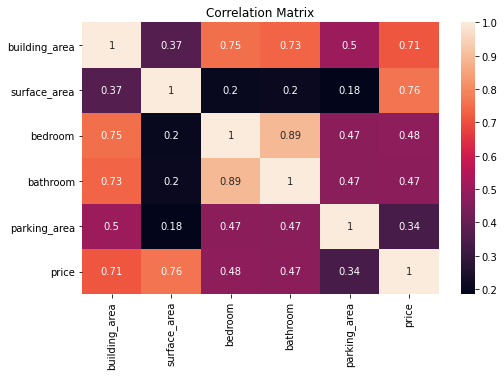

In [3]:
plt.figure(figsize=(8,5))
sns.heatmap(data= df.corr(), annot=True).set_title("Correlation Matrix")
plt.show()

From the correlation matrix above, we can see that the most affect features for house price is __Surface Area__. So we can assume, the bigger surface area, the higher the land value, and it doesn't matter if that house doesn't have any supporting facilities like a lot of bathroom or bedroom or etc, as long as the land area is promising, then that house has high value.
<br>

So what about the facilities? do they not have a correlation for house price? does it not matter at all? let's see!

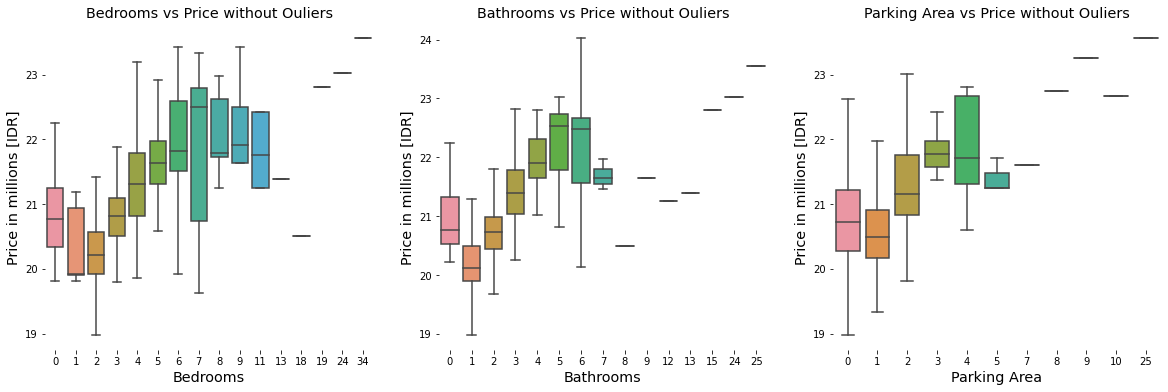

In [ ]:
f, axes = plt.subplots(1, 3,figsize=(20,6))
sns.boxplot(x=df['bedroom'],y=df['price'], showfliers=False, ax=axes[0])
sns.boxplot(x=df['bathroom'],y=df['price'], showfliers=False, ax=axes[1])
sns.boxplot(x=df['parking_area'],y=df['price'], showfliers=False, ax=axes[2])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price in millions [IDR]', title='Bedrooms vs Price without Ouliers')
axes[1].set(xlabel='Bathrooms', ylabel='Price in millions [IDR]', title='Bathrooms vs Price without Ouliers')
axes[2].set(xlabel='Parking Area', ylabel='Price in millions [IDR]', title='Parking Area vs Price without Ouliers')
plt.show()

We can see clearly by making a boxplot without outliers for each facility. So from the boxplot above, that facilities are had affect to house price, like in bedroom boxplot, the more bedroom, the higher house price, although that we look at from correlation matrix above, it's not too significant. 
<br>

So at the end, we can assume that people in Cimahi are prioritizing the surface area as a reference for the amount of house prices, facilities are only a supporting factor.

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


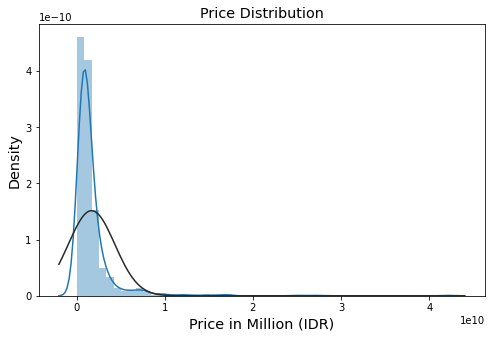

In [39]:
plt.figure(figsize=(8,5))
sns.distplot(df['price'],fit=stats.norm).set_title('Price Distribution')
plt.xlabel('Price in Million (IDR)')
plt.show()

From above, It's turns out that the feature target distribution is `right-skewed`, so we need to transform it to normal distribution use `log` numpy function, because we need a normal distribution feature target for linear regression model. 

C:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


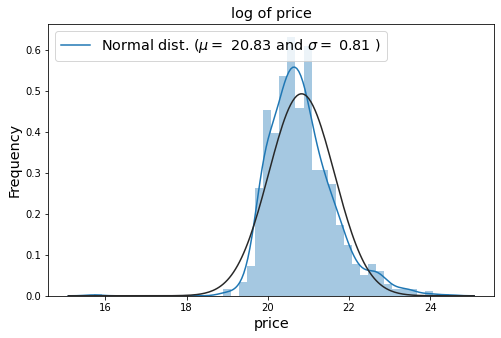

In [40]:
# Using log function to normalize the distribution 
df['price'] = np.log1p(df['price'])

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df['price'])

# Making plot
plt.subplots(figsize=(8,5))
sns.distplot(df['price'], fit=stats.norm).set_title('log of price')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='upper left')
plt.ylabel('Frequency')
plt.show()

## Insight

So we can summarize the results of the analysis above into several points as follows :
    
- Bedrooms and Bathrooms in houses in Cimahi and its surroundings, generally amount to 1 till 3 rooms, this because it's adjusted by land area and house occupant's needs.
<br>
- Surface and Building area in houses in Cimahi and its surroundings, generally measuring at 120 meter squared, a quite small size for a house. So this is why makes many houses that don't have parking spaces or garages even only just fit for 1 car though.
<br> 
- Surface area and Building area are the most affect features for house price. These are to be the reference factor in determining house prices amount. While facilities such as bedrooms, bathrooms, and parking areas are only supporting factors. The bigger of land size, the higher house value.
<br>    
- The price per meter in Cimahi and its surroundings is in a range of 7 million till 11 million rupiah per meter squared, and the area that has the most expensive price per meter is 'Cimahi Tengah'. However, the promising areas for home buyers are 'Cimahi Utara' and 'Cimahi Selatan', because the land area is bigger, but the price per meter is lower than other areas.

In the next stage, we will use this dataset for model prediction, let's go!

## Export Dataset

In [5]:
df.to_csv('house_model.csv',index= False)